In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df = pd.read_excel('Real estate valuation data set.xlsx')

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
X = df['X2 house age']
y = df['Y house price of unit area']

### Linear Regression with one feature
h(X) = theta0 + theta1 * X<br>
J(theta0, theta1) = sum((h(X) - y)^2) / (2 * m)

**Gradient Descent**<br>
theta0 = theta0 - alpha * dJ(theta0, theta1)/d(theta0)<br>
theta1 = theta1 - alpha * dJ(theta0, theta1)/d(theta1)<br>

Text(0, 0.5, 'House Price per unit area')

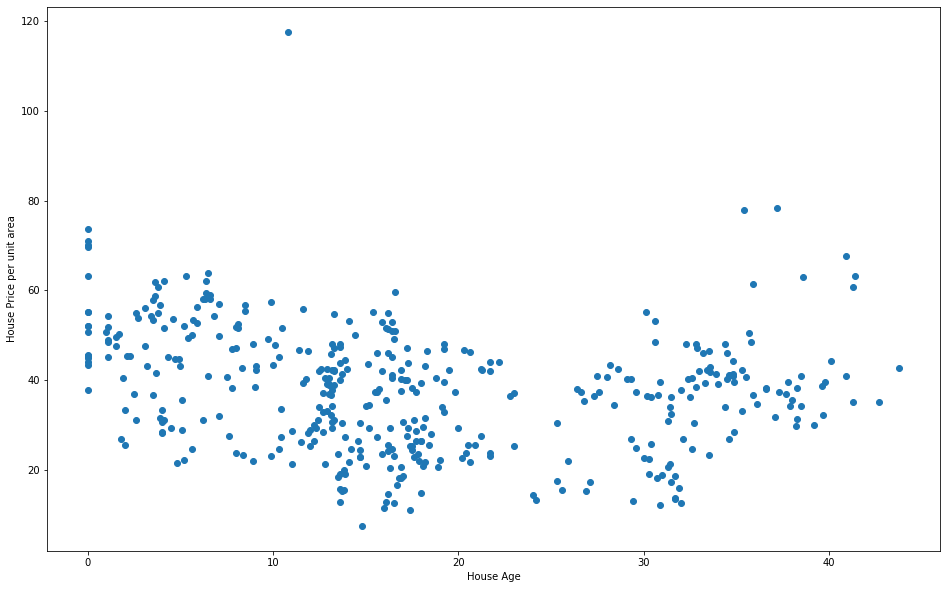

In [5]:
plt.figure(figsize = (16, 10))
plt.scatter(X, y)
plt.xlabel('House Age')
plt.ylabel('House Price per unit area')

#### Adding column for theta0 which is intercept & do not interact with any input

In [6]:
m = len(y)
# add column of ones to X
X = np.ones([m, 2])
X[:, 1] = df['X2 house age']
X.shape

(414, 2)

#### Initializing theta

In [7]:
theta = np.array([30, 0]).reshape(-1, 1)
prediction = np.dot(X, theta)
prediction.shape

(414, 1)

#### Making y as a numpy array

In [8]:
y = np.array(y).reshape(-1, 1)
y.shape

(414, 1)

### Cost Function

In [9]:
def cost_function(X, y, theta):
    m = len(y)
    prediction = np.dot(X, theta)
    J = np.sum((prediction - y)**2) / (2*m)
    return J

In [10]:
cost_function(X, y, theta)

124.18640096618357

### Gradient Descent

In [11]:
def gradient_descent(X, y, theta, alpha, num_iters):
    J_history = np.zeros([num_iters, 1])
    for i in range(0, num_iters):
        prediction = np.dot(X, theta)
        theta = theta - np.dot(np.transpose(X), (prediction - y)) * (alpha / m)
        J_history[i, 0] = cost_function(X, y, theta)
    return theta, J_history

In [12]:
theta_min, J_total = gradient_descent(X, y, theta, 0.004, 2000)
theta_min1, J_total1 = gradient_descent(X, y, theta, 0.004, 1000)
theta_min2, J_total2 = gradient_descent(X, y, theta, 0.001, 100)

In [13]:
print(theta_min, theta_min1, theta_min2, theta)

[[41.23145053]
 [-0.2033699 ]] [[38.56814844]
 [-0.0968629 ]] [[30.36702053]
 [ 0.23110494]] [[30]
 [ 0]]


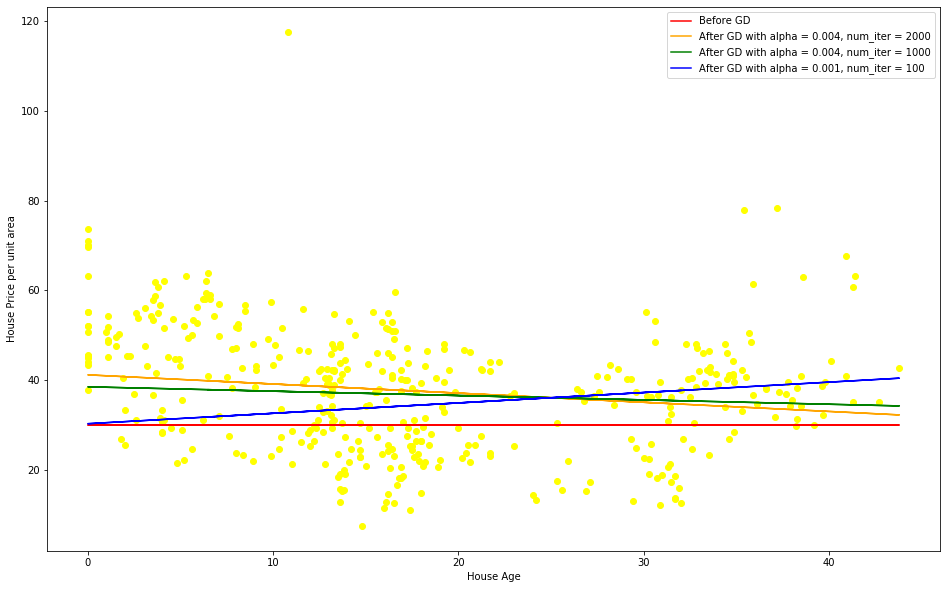

In [14]:
X_ = df['X2 house age']
plt.figure(figsize = (16, 10))
plt.scatter(X_, y, color = 'yellow')
plt.xlabel('House Age')
plt.ylabel('House Price per unit area')
y_pred_old = theta[0] + theta[1]*X_
y_pred_new = theta_min[0] + theta_min[1]*X_
y_pred_new1 = theta_min1[0] + theta_min1[1]*X_
y_pred_new2 = theta_min2[0] + theta_min2[1]*X_
plt.plot(X_, y_pred_old, label = 'Before GD', color = 'r')
plt.plot(X_, y_pred_new, label = 'After GD with alpha = 0.004, num_iter = 2000', color = 'orange')
plt.plot(X_, y_pred_new1, label = 'After GD with alpha = 0.004, num_iter = 1000', color = 'green')
plt.plot(X_, y_pred_new2, label = 'After GD with alpha = 0.001, num_iter = 100', color = 'b')
plt.legend()

### Scikit Learn LinearRegression

In [15]:
inp = np.array(df['X2 house age']).reshape(-1, 1)
linreg = LinearRegression().fit(inp, y)
preds = linreg.predict(inp)
sqrt(mean_squared_error(y, preds))

13.285348095978287

In [16]:
linreg.coef_[0][0]

-0.25148841908534547

In [17]:
linreg.intercept_[0]

42.4346970462629

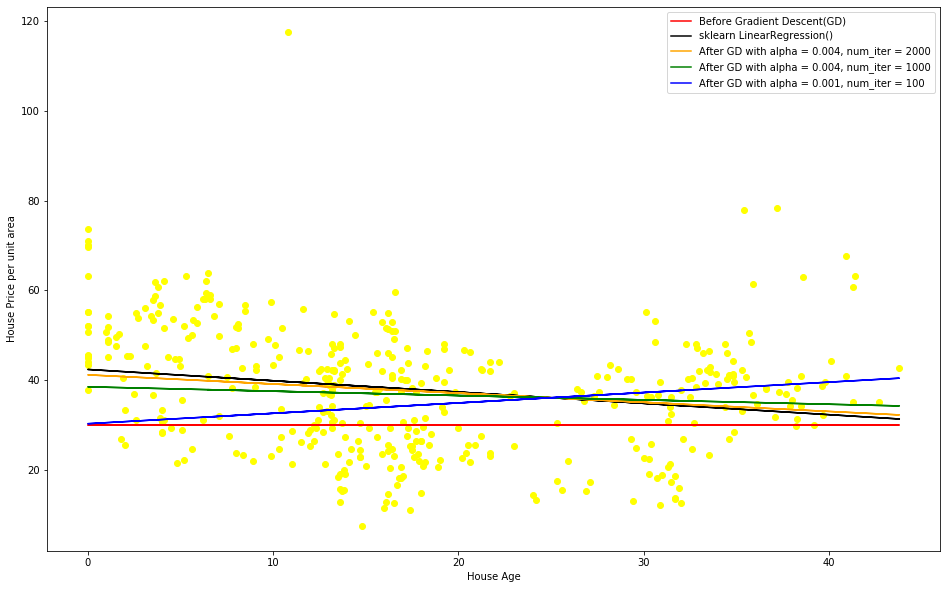

In [18]:
X_ = df['X2 house age']
plt.figure(figsize = (16, 10))
plt.scatter(X_, y, color = 'yellow')
plt.xlabel('House Age')
plt.ylabel('House Price per unit area')
y_pred_old = theta[0] + theta[1]*X_
y_pred_new = theta_min[0] + theta_min[1]*X_
y_pred_new1 = theta_min1[0] + theta_min1[1]*X_
y_pred_new2 = theta_min2[0] + theta_min2[1]*X_
y_pred_sk = linreg.intercept_[0] + linreg.coef_[0][0]*X_
plt.plot(X_, y_pred_old, label = 'Before Gradient Descent(GD)', color = 'r')
plt.plot(X_, y_pred_sk, label = 'sklearn LinearRegression()', color = 'black')
plt.plot(X_, y_pred_new, label = 'After GD with alpha = 0.004, num_iter = 2000', color = 'orange')
plt.plot(X_, y_pred_new1, label = 'After GD with alpha = 0.004, num_iter = 1000', color = 'green')
plt.plot(X_, y_pred_new2, label = 'After GD with alpha = 0.001, num_iter = 100', color = 'b')
plt.legend()

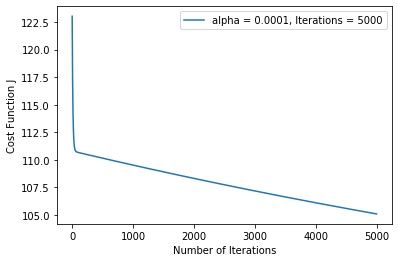

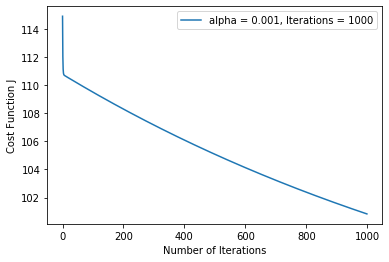

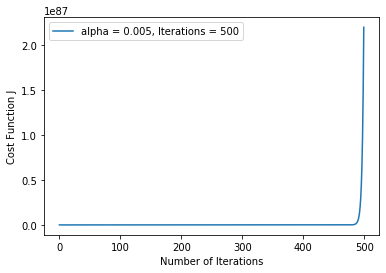

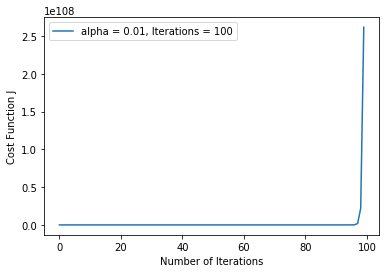

In [19]:
iters = [5000, 1000, 500, 100]
c = 0
for alpha in [0.0001, 0.001, 0.005, 0.01]:
    th = np.array([30, 0]).reshape(-1, 1)
    J_hist = np.zeros([iters[c], 1])
    for i in range(0, iters[c]):
        prediction = np.dot(X, th)
        th = th - np.dot(np.transpose(X), (prediction - y))*(alpha / m)
        J_hist[i, 0] = cost_function(X, y, th)
    arr = range(0, iters[c])
    plt.figure()
    plt.plot(arr, J_hist, label = f"alpha = {alpha}, Iterations = {iters[c]}")
    plt.legend()
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost Function J')
    c += 1

### Regularized Cost Function

In [20]:
def regularized_cost_function(X, y, theta, l):
    m = len(y)
    prediction = np.dot(X, theta)
    J = (np.sum((prediction - y)**2) + np.sum((theta[1:, 0]**2)) * l) / (2*m)
    return J

In [21]:
regularized_cost_function(X, y, theta, 1)

124.18640096618357

### Regularized Gradient Descent

In [22]:
def regularized_gradient_descent(X, y, theta, alpha, num_iters, l):
    m = len(y)
    for i in range(0, num_iters):
        prediction = np.dot(X, theta)
        theta0 = theta[0, 0]
        theta = theta * (1 - l*alpha/m) - np.dot(np.transpose(X), (prediction - y)) * (alpha / m)
        theta[0, 0] = theta0 - np.dot(np.transpose(X[:, 0]), (prediction - y)) * (alpha / m)
        J = regularized_cost_function(X, y, theta, l)
    return theta, J

In [23]:
theta_min_r, J_total_r = regularized_gradient_descent(X, y, theta, 0.004, 2000, 1)
theta_min1_r, J_total1_r = regularized_gradient_descent(X, y, theta, 0.004, 1000, 10)
theta_min2_r, J_total2_r = regularized_gradient_descent(X, y, theta, 0.001, 100, 100)

In [24]:
print(theta_min_r, theta_min1_r, theta_min2_r, theta)

[[41.23141263]
 [-0.20336727]] [[38.56817287]
 [-0.09685862]] [[30.36723669]
 [ 0.23097045]] [[30]
 [ 0]]


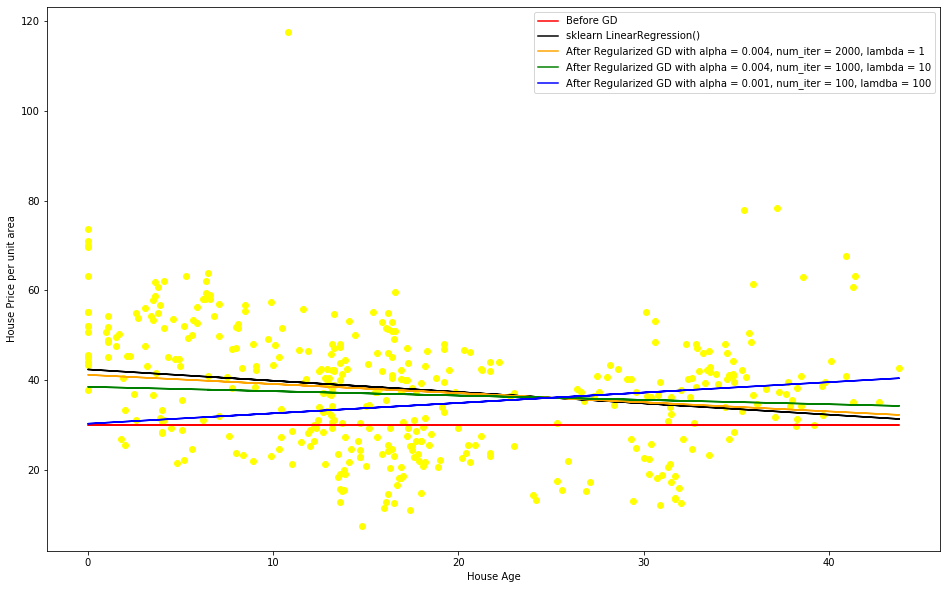

In [25]:
X_ = df['X2 house age']
plt.figure(figsize = (16, 10))
plt.scatter(X_, y, color = 'yellow')
plt.xlabel('House Age')
plt.ylabel('House Price per unit area')
y_pred_old = theta[0] + theta[1]*X_
y_pred_new_r = theta_min_r[0] + theta_min_r[1]*X_
y_pred_new1_r = theta_min1_r[0] + theta_min1_r[1]*X_
y_pred_new2_r = theta_min2_r[0] + theta_min2_r[1]*X_
plt.plot(X_, y_pred_old, label = 'Before GD', color = 'r')
plt.plot(X_, y_pred_sk, label = 'sklearn LinearRegression()', color = 'black')
plt.plot(X_, y_pred_new_r, label = 'After Regularized GD with alpha = 0.004, num_iter = 2000, lambda = 1', color = 'orange')
plt.plot(X_, y_pred_new1_r, label = 'After Regularized GD with alpha = 0.004, num_iter = 1000, lambda = 10', color = 'green')
plt.plot(X_, y_pred_new2_r, label = 'After Regularized GD with alpha = 0.001, num_iter = 100, lamdba = 100', color = 'b')
plt.legend()